In [1]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import bqplot as bq

In [2]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [3]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

------ Endpoint not found - Sleeping for 5 seconds and retrying ------


In [4]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [29]:
# Define the updated mapping of places to categories
place_categories = {
    'Venice': 'Large centers',
    'Paris': 'Large centers',
    'Wittenberg': 'Large centers',
    'Antwerp': 'Medium centers',
    'Leipzig': 'Medium centers',
    'Frankfurt (Main)': 'Medium centers',
    'Lyon': 'Medium centers',
    'Cologne': 'Medium centers',
    'London': 'Medium centers',
    'Rome': 'Small centers',
    'Strasbourg': 'Small centers',
    'Seville': 'Small centers',
    'Leiden': 'Small centers',
    'Milan': 'Small centers',
    'Saint Gervais': 'Small centers',
    'Florence': 'Small centers',
    'Kraków': 'Small centers',
    'Salamanca': 'Small centers',
    'Lisbon': 'Small centers',
    'Bologna': 'Small centers',
    'Madrid': 'Small centers',
    'Sine loco': 'Small centers',
    'Basel': 'Small centers',
    'Lemgo': 'Small centers',
    'Dijon': 'Small centers',
    'Valladolid': 'Small centers',
    'Perugia': 'Small centers',
    'Siena': 'One book centers',
    'Avignon': 'One book centers',
    'Vienna': 'One book centers',
    'Ferrara': 'One book centers',
    'Padua': 'One book centers',
    'Nuremberg': 'One book centers',
    'Neustadt an der Weinstraße': 'One book centers',
    'Mexico City': 'One book centers',
    'Mainz': 'One book centers',
    'Coimbra': 'One book centers',
    'Leuven': 'One book centers',
    'Ingolstadt': 'One book centers',
    'Heidelberg': 'One book centers',
    'Geneva': 'One book centers',
    'Dillingen an der Donau': 'One book centers',
    'Alcalá de Henares': 'One book centers'
}

# Ensure 'place' column exists in merged_df and is in the format we expect
df['place'] = df['place'].astype(str)

# Create the 'place_category' column by mapping the 'place' column to categories
df['place_category'] = df['place'].map(place_categories)

# Group by 'place_category' and count the number of unique 'book' values and unique 'place' values in each category
unique_books_and_places_per_category = df.groupby('place_category').agg(
    unique_books_count=('book', 'nunique'),
    unique_places_count=('place', 'nunique')
).reset_index()

# Print the unique place categories, the number of unique books, and the number of unique places
print(unique_books_and_places_per_category)


     place_category  unique_books_count  unique_places_count
0     Large centers                 184                    3
1    Medium centers                  95                    6
2  One book centers                  15                   15
3     Small centers                  48                   18


In [30]:
# Define the city_position dictionary (same as before)
city_position = {
    'Alcalá de Henares': (40.4818396, -3.3644973),
    'Antwerp': (51.2211097, 4.3997081),
    'Augsburg': (48.3690341, 10.8979522),
    'Avignon': (43.9492493, 4.8059012),
    'Basel': (47.5581077, 7.5878261),
    'Bologna': (44.4938203, 11.3426327),
    'Bordeaux': (44.841225, -0.5800364),
    'Coimbra': (40.2111931, -8.4294632),
    'Cologne': (43.7218277, 0.9774958),
    'Dijon': (47.3215806, 5.0414701),
    'Dillingen an der Donau': (48.5812791, 10.4951026),
    'Dortmund': (51.5142273, 7.4652789),
    'Ferrara': (44.8372737, 11.6186451),
    'Florence': (43.7697955, 11.2556404),
    'Frankfurt am Main': (50.1106444, 8.6820917),
    'Frankfurt an der Oder': (52.3412273, 14.549452),
    'Geneva': (46.2047169, 6.1423106290939335),
    'Heidelberg': (49.4093582, 8.694724),
    'Ingolstadt': (48.7630165, 11.4250395),
    'Kraków': (50.0469432, 19.997153435836697),
    'Leiden': (52.1594747, 4.4908843),
    'Leipzig': (51.3406321, 12.3747329),
    'Lemgo': (52.0280674, 8.9012894),
    'Leuven': (50.879202, 4.7011675),
    'Lisbon': (38.7077507, -9.1365919),
    'London': (51.4893335, -0.14405508452768728),
    'Lyon': (45.7578137, 4.8320114),
    'Madrid': (40.4167047, -3.7035825),
    'Mainz': (50.0012314, 8.2762513),
    'Mexico City': (19.4326296, -99.1331785),
    'Milan': (45.4641943, 9.1896346),
    'Neustadt an der Weinstraße': (49.3539802, 8.1350021),
    'Nuremberg': (49.453872, 11.077298),
    'Padua': (45.4077172, 11.8734455),
    'Paris': (48.8534951, 2.3483915),
    'Perugia': (43.1119613, 12.3890104),
    'Pesaro': (43.9098114, 12.9131228),
    'Rome': (41.8933203, 12.4829321),
    'Saint Gervais': (45.2022356, 5.4820229),
    'Salamanca': (40.9651572, -5.6640182),
    'Seville': (37.3886303, -5.9953403),
    'Siena': (43.3185536, 11.3316533),
    'Sine loco': None,
    'Strasbourg': (48.584614, 7.7507127),
    'Tournon': (45.0675156, 4.832852),
    'Tübingen': (48.5236164, 9.0535531),
    'Valladolid': (41.6521328, -4.728562),
    'Venice': (45.4371908, 12.3345898),
    'Vienna': (48.2083537, 16.3725042),
    'Wittenberg': (51.8666527, 12.646761)
}

# Assuming 'merged_df' is your existing DataFrame and has a 'place' column
# Create a function to map the place name to latitude and longitude
def get_coordinates(city):
    return city_position.get(city, (None, None))  # Returns None if city is not found in the dictionary

# Apply the function to create 'latitude' and 'longitude' columns
df[['latitude', 'longitude']] = df['place'].apply(lambda city: pd.Series(get_coordinates(city)))

# Drop rows where 'latitude' or 'longitude' is NaN
#df = df.dropna(subset=['latitude', 'longitude'])

#df

In [31]:
df['cks'] = df['cks'].astype(str)
df['cks'] = df['cks'].str.split(', ')
df_exploded = df.explode('cks')

# Remove brackets, single quotes, double quotes, and leading/trailing whitespace
df_exploded['cks'] = df_exploded['cks'].str.replace(r"[\[\]\"']", "", regex=True).str.strip()

df_exploded.reset_index(drop=True, inplace=True)

In [32]:
# Count unique values in the specified column
unique_count = df_exploded['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 20540


In [33]:
# Define the target cks values
target_cks = ['CK_Right and Oblique Sphere']

# Step 1: Filter the DataFrame for rows where 'cks' is in the target_cks list
filtered_df_target_cks = df_exploded[df_exploded['cks'].isin(target_cks)]

# Step 2: Get the unique 'images' values associated with the target cks
images_with_target_cks = filtered_df_target_cks['images'].unique()

# Step 3: Filter the original DataFrame to include all rows that have these images
filtered_df = df_exploded[df_exploded['images'].isin(images_with_target_cks)]

# Display the filtered DataFrame
#filtered_df

In [34]:
# Count unique values in the specified column
unique_count = filtered_df['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 667


In [35]:
# Count unique images associated with each cks value
unique_images_per_cks = filtered_df.groupby('cks')['images'].nunique()

# Print the results
print('Number of unique images associated with each cks value:')
print(unique_images_per_cks)

Number of unique images associated with each cks value:
cks
CK_11 Spheres                    2
CK_Armillary Sphere              4
CK_Elevation of the Pole        48
CK_Five Zones                    3
CK_Geometry for Geometry        82
CK_Horizon                     408
CK_Introduction to Geometry      2
CK_Right and Oblique Sphere    667
CK_Sun Lines and Motion         82
CK_Terraqueous Globe             3
Name: images, dtype: int64


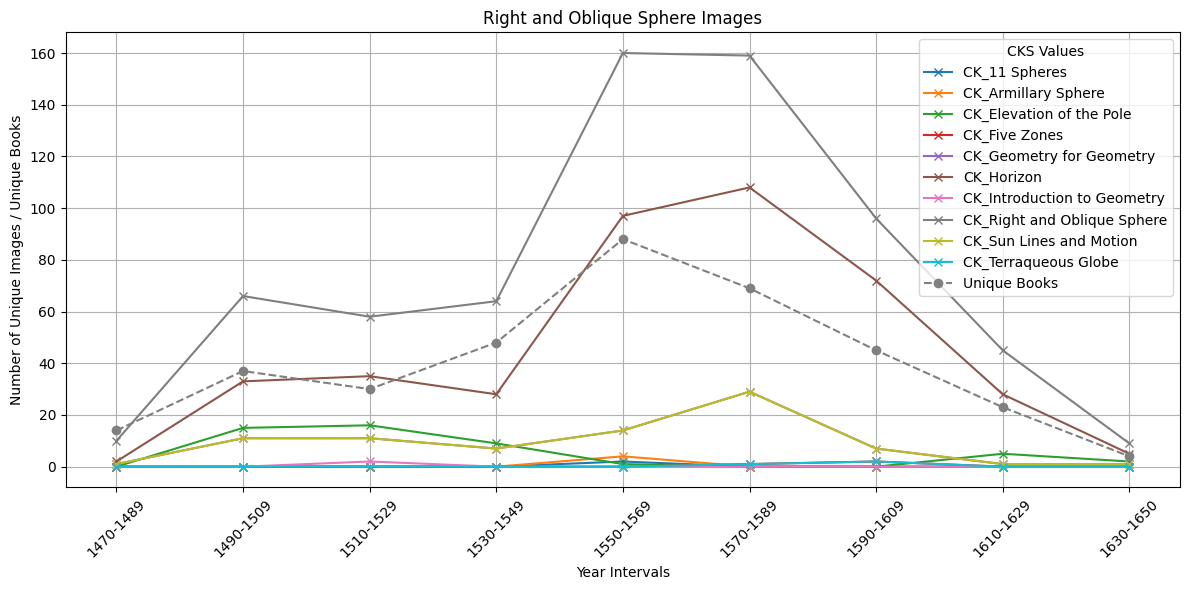

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure filtered_df and books are treated as copies (if required)
filtered_df = filtered_df.copy()
books = books.copy()

# Ensure 'year' columns are of integer type
filtered_df['year'] = filtered_df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1650'
]

# Add 'interval' column to the filtered_df DataFrame based on custom bins
filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Add 'interval' column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Step 1: Group by both 'cks' and 'interval' and count unique 'images'
# Add observed=False to prevent the FutureWarning
unique_images_by_cks_interval = filtered_df.groupby(['interval', 'cks'], observed=False)['images'].nunique().unstack(fill_value=0)

# Step 2: Count the total number of unique books by 'interval'
# Add observed=False to prevent the FutureWarning
unique_books_count = books.groupby('interval', observed=False)['book'].nunique()

# Step 3: Plot the results
plt.figure(figsize=(12, 6))

# Plot unique images for each 'cks' value
for cks_value in unique_images_by_cks_interval.columns:
    plt.plot(unique_images_by_cks_interval.index.astype(str), unique_images_by_cks_interval[cks_value].values, 
             label=cks_value, marker='x')

# Plot the number of unique books as a dashed grey line
plt.plot(unique_books_count.index.astype(str), unique_books_count.values, label='Unique Books', marker='o', color='grey', linestyle='--')

# Customize the plot
plt.title('Right and Oblique Sphere Images')
plt.xlabel('Year Intervals')
plt.ylabel('Number of Unique Images / Unique Books')
plt.xticks(rotation=45)
plt.legend(title='CKS Values')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [1]:
path_to_xlsx = 'C:\\Users\\nogas\\Image_data\\VT_1.2_right_and_oblique_spheres.xlsx'
visual = pd.read_excel(path_to_xlsx)
right_oblique_visual = pd.merge(filtered_df, visual, on='cluster_name')
#right_oblique_visual

NameError: name 'pd' is not defined

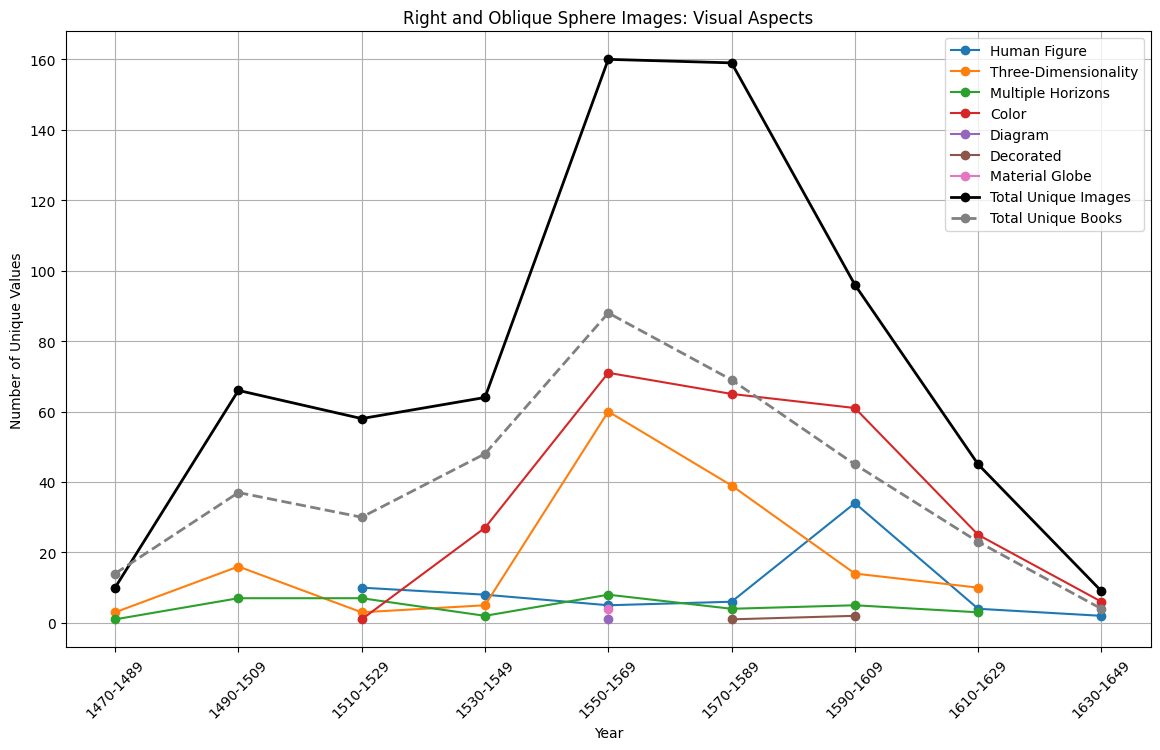

In [38]:
# Ensure the 'year' column is of type int
right_oblique_visual['year'] = right_oblique_visual['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
right_oblique_visual['interval'] = pd.cut(right_oblique_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Filter and group data for each category
def count_unique_images_by_column(column_name, value):
    filtered_df = right_oblique_visual[right_oblique_visual[column_name] == value]
    # Set observed=True to avoid FutureWarning
    return filtered_df.groupby('interval', observed=True)['images'].nunique()

# Collect data
human_figures = count_unique_images_by_column('human figure', 'yes')
three_dimensionality_effect = count_unique_images_by_column('3D', 'yes')
multiple_horizons = count_unique_images_by_column('Multiple horizons', 'yes')
color_blocks = count_unique_images_by_column('color', 'yes')
circle_effect = count_unique_images_by_column('circle', 'yes')
double_images = count_unique_images_by_column('double image', 'yes')
diagrams = count_unique_images_by_column('diagram', 'yes')
decorated_images = count_unique_images_by_column('decorated', 'yes')
material_globes = count_unique_images_by_column('material globe', 'yes')

# Combine the data for line plots
side_by_side_data = pd.DataFrame({
    'Human Figure': human_figures,
    'Three-Dimensionality': three_dimensionality_effect,
    'Multiple Horizons': multiple_horizons,
    'Color': color_blocks,
 #   'Circle': circle_effect,
 #   'Double Image': double_images,
    'Diagram': diagrams,
    'Decorated': decorated_images,
    'Material Globe': material_globes
})

# Ensure 'books' DataFrame is defined and has the correct columns
# For demonstration, let's assume it has the same structure as `sphericity_earth_full`
# If 'books' is a different DataFrame, adjust accordingly.
total_unique_books_df = books.groupby('interval', observed=True)['book'].nunique()

# Calculate total number of unique images in 'sphericity_earth_full' for each interval
total_unique_images = right_oblique_visual.groupby('interval', observed=True)['images'].nunique()

# Plot lines for each category
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category
for column in side_by_side_data.columns:
    ax.plot(side_by_side_data.index, side_by_side_data[column], marker='o', label=column)

# Plot the lines for total unique images and total unique books
ax.plot(total_unique_images.index, total_unique_images.values, marker='o', linestyle='-', color='black', label='Total Unique Images', linewidth=2)
ax.plot(total_unique_books_df.index, total_unique_books_df.values, marker='o', linestyle='--', color='gray', label='Total Unique Books', linewidth=2)

plt.xlabel('Year')
plt.ylabel('Number of Unique Values')
plt.title('Right and Oblique Sphere Images: Visual Aspects')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


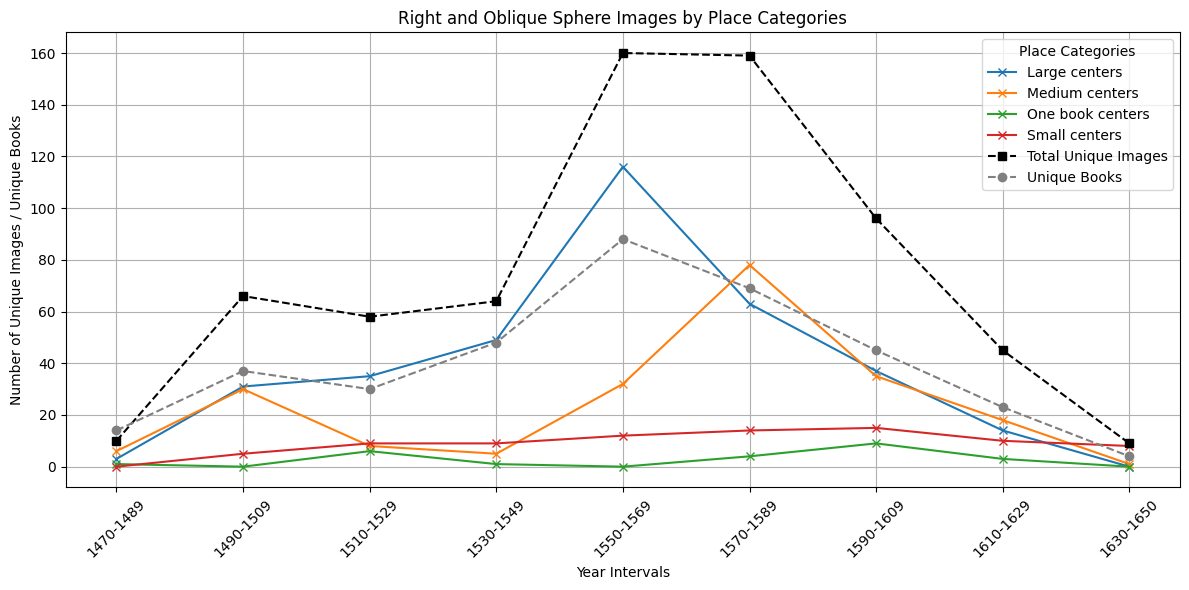

In [39]:
# Ensure filtered_df and books are treated as copies (if required)
right_oblique_visual = right_oblique_visual.copy()
books = books.copy()

# Ensure 'year' columns are of integer type
right_oblique_visual['year'] = right_oblique_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1650'
]

# Add 'interval' column to the filtered_df DataFrame based on custom bins
right_oblique_visual['interval'] = pd.cut(right_oblique_visual['year'], bins=bins, labels=labels, right=False)

# Add 'interval' column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Count unique images by interval and place_category in filtered_df
unique_images_by_place = right_oblique_visual.groupby(['interval', 'place_category'], observed=False)['images'].nunique().unstack(fill_value=0)

# Count the total number of unique images across all place categories for each interval
total_unique_images = right_oblique_visual.groupby('interval', observed=False)['images'].nunique()

# Count unique books by interval in the books DataFrame
unique_books_count = books.groupby('interval', observed=False)['book'].nunique()

# Step 3: Plot the results
plt.figure(figsize=(12, 6))

# Plot unique images for each place category
for place_category in unique_images_by_place.columns:
    plt.plot(unique_images_by_place.index.astype(str), unique_images_by_place[place_category], label=place_category, marker='x')

# Plot the total unique images as a dashed line
plt.plot(total_unique_images.index.astype(str), total_unique_images.values, label='Total Unique Images', marker='s', color='black', linestyle='--')

# Plot the number of unique books as a dashed grey line
plt.plot(unique_books_count.index.astype(str), unique_books_count.values, label='Unique Books', marker='o', color='grey', linestyle='--')

# Customize the plot
plt.title('Right and Oblique Sphere Images by Place Categories')
plt.xlabel('Year Intervals')
plt.ylabel('Number of Unique Images / Unique Books')
plt.xticks(rotation=45)
plt.legend(title='Place Categories')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


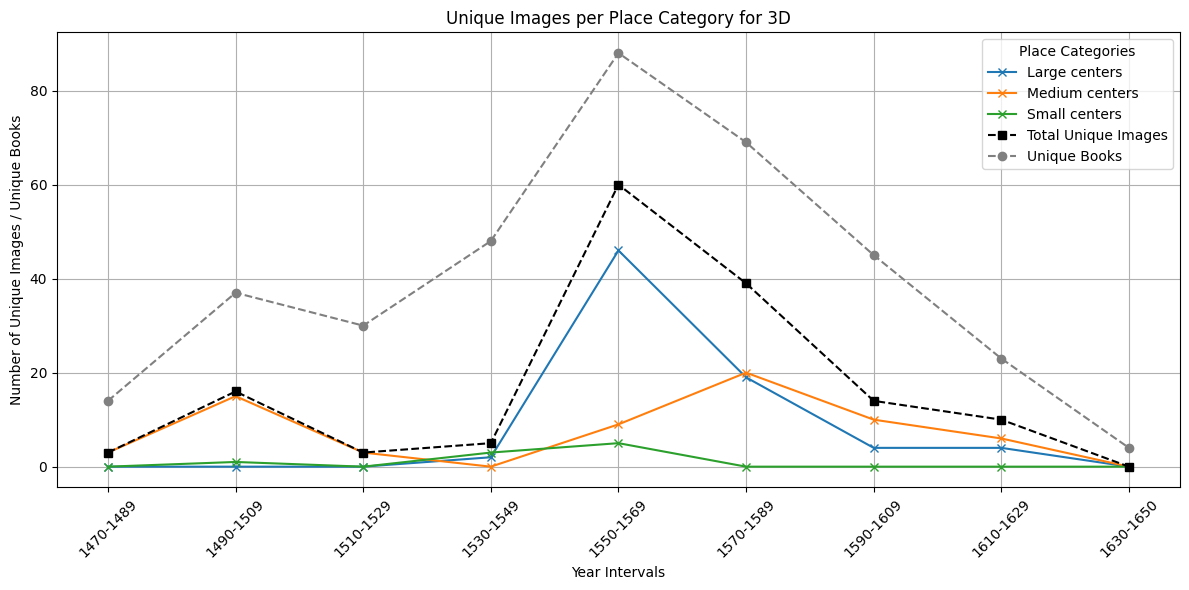

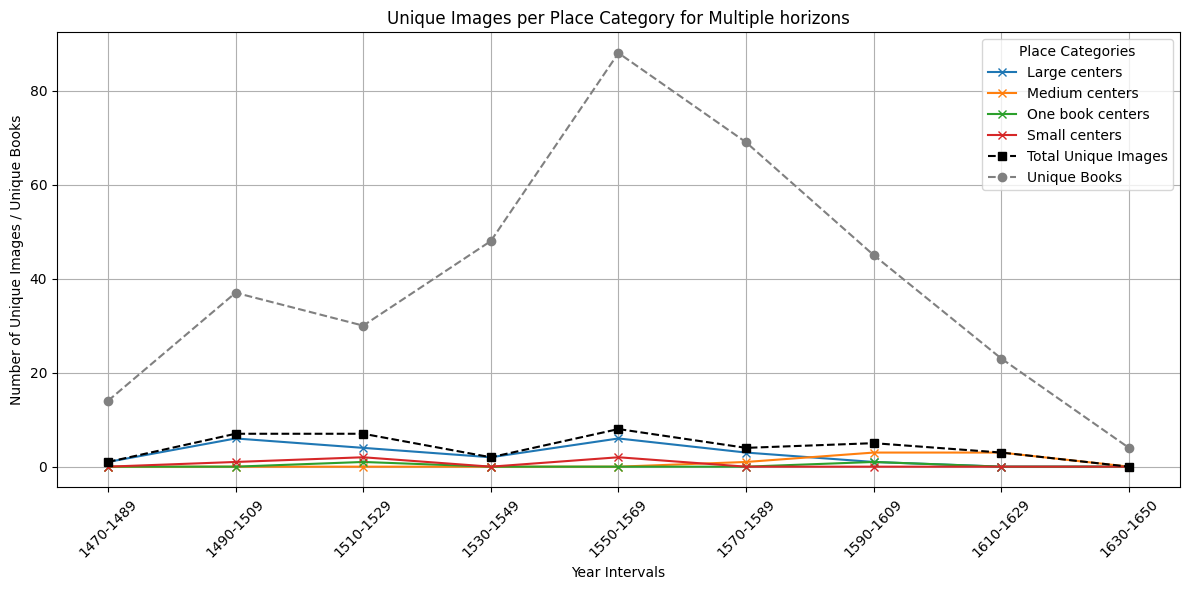

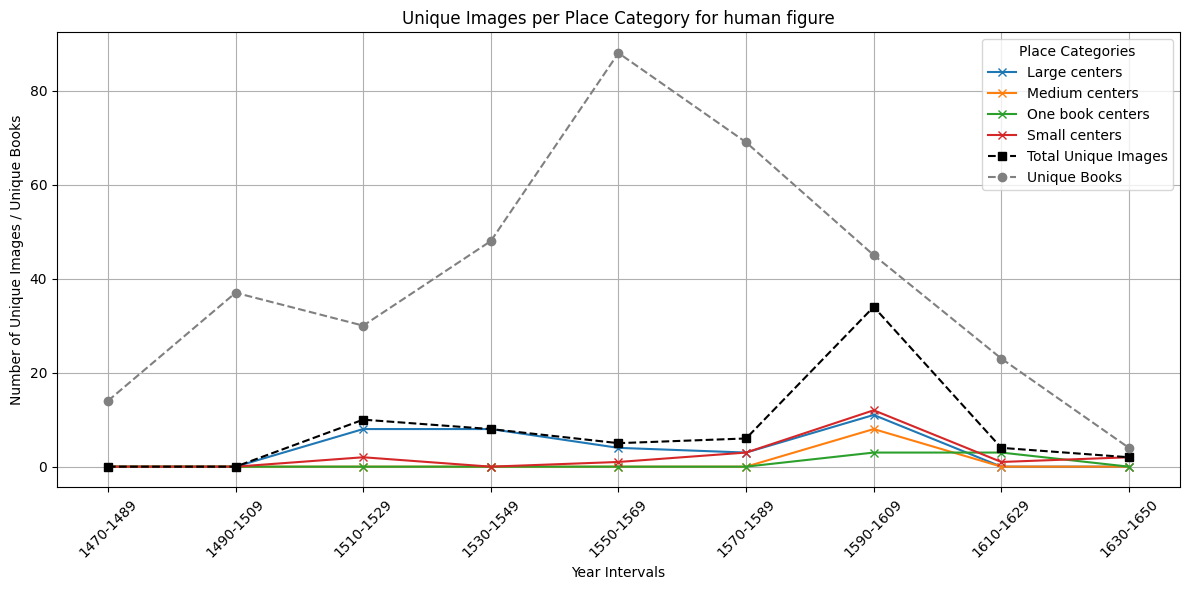

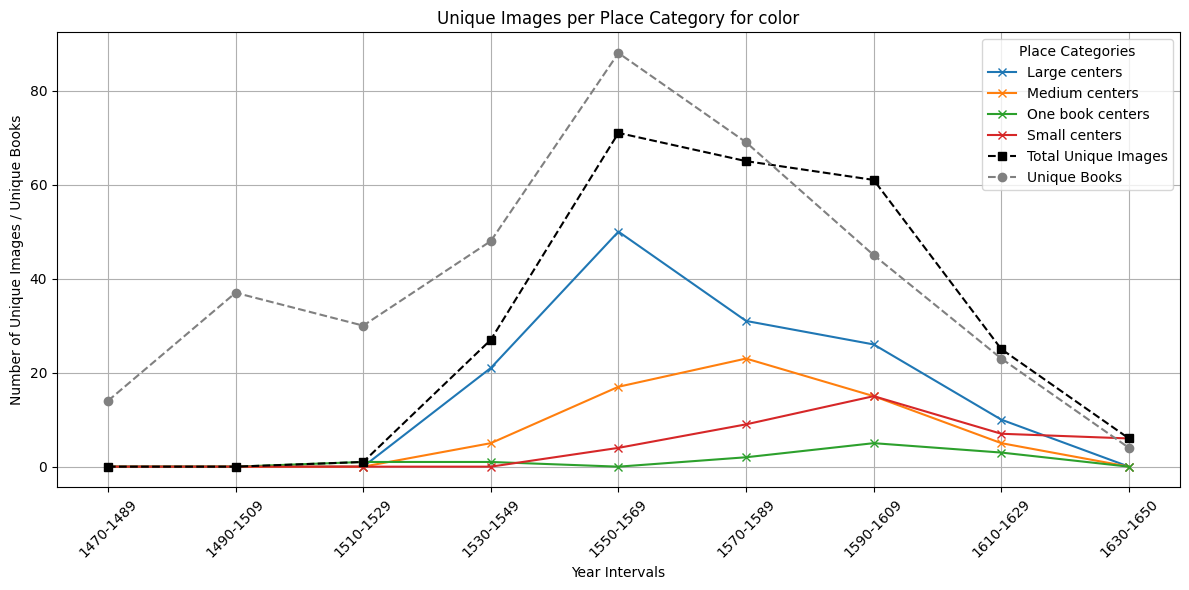

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure right_oblique_visual and books are treated as copies (if required)
right_oblique_visual = right_oblique_visual.copy()
books = books.copy()

# Ensure 'year' columns are of integer type
right_oblique_visual['year'] = right_oblique_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549', 
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1650'
]

# Add 'interval' column to the right_oblique_visual DataFrame based on custom bins
right_oblique_visual['interval'] = pd.cut(right_oblique_visual['year'], bins=bins, labels=labels, right=False)

# Add 'interval' column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define the columns for which you want to plot 'yes' values
columns_to_plot = ['3D', 'Multiple horizons', 'human figure', 'color']

# Step 1: Plot the results for each column ('yes' values)
for column in columns_to_plot:
    # Step 2: Filter the right_oblique_visual DataFrame for 'yes' in the current column
    condition = right_oblique_visual[column] == 'yes'
    filtered_column_df = right_oblique_visual[condition]
    
    # Count unique images by interval and place_category for the current column
    unique_images_by_place = filtered_column_df.groupby(['interval', 'place_category'], observed=False)['images'].nunique().unstack(fill_value=0)
    
    # Count the total number of unique images across all place categories for each interval
    total_unique_images = filtered_column_df.groupby('interval', observed=False)['images'].nunique()

    # Count unique books by interval in the books DataFrame for the current column
    unique_books_count = books.groupby('interval', observed=False)['book'].nunique()

    # Step 3: Plot the results for the current column
    plt.figure(figsize=(12, 6))

    # Plot unique images for each place category
    for place_category in unique_images_by_place.columns:
        plt.plot(unique_images_by_place.index.astype(str), unique_images_by_place[place_category], label=place_category, marker='x')

    # Plot the total unique images as a dashed line
    plt.plot(total_unique_images.index.astype(str), total_unique_images.values, label='Total Unique Images', marker='s', color='black', linestyle='--')

    # Plot the number of unique books as a dashed grey line
    plt.plot(unique_books_count.index.astype(str), unique_books_count.values, label='Unique Books', marker='o', color='grey', linestyle='--')

    # Customize the plot
    plt.title(f'Unique Images per Place Category for {column}')
    plt.xlabel('Year Intervals')
    plt.ylabel('Number of Unique Images / Unique Books')
    plt.xticks(rotation=45)
    plt.legend(title='Place Categories')
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()


In [42]:
# Print the number of unique values in the 'images' column
unique_images_count = right_oblique_visual['images'].nunique()
print(f"Number of unique 'images' values: {unique_images_count}")

# Print the unique values in the 'cks' column
unique_cks_values = right_oblique_visual['cks'].unique()
print("Unique 'cks' values:")
print(unique_cks_values)


Number of unique 'images' values: 667
Unique 'cks' values:
['CK_Horizon' 'CK_Right and Oblique Sphere' 'CK_Sun Lines and Motion'
 'CK_Geometry for Geometry' 'CK_Elevation of the Pole'
 'CK_Armillary Sphere' 'CK_Five Zones' 'CK_Terraqueous Globe'
 'CK_Introduction to Geometry' 'CK_11 Spheres']


In [43]:
# Drop rows where 'latitude' or 'longitude' is NaN
right_oblique_visual = right_oblique_visual.dropna(subset=['latitude', 'longitude'])

In [44]:
# Print the number of unique values in the 'images' column
unique_images_count = right_oblique_visual['images'].nunique()
print(f"Number of unique 'images' values: {unique_images_count}")

# Print the unique values in the 'cks' column
unique_cks_values = right_oblique_visual['cks'].unique()
print("Unique 'cks' values:")
print(unique_cks_values)


Number of unique 'images' values: 658
Unique 'cks' values:
['CK_Horizon' 'CK_Right and Oblique Sphere' 'CK_Sun Lines and Motion'
 'CK_Geometry for Geometry' 'CK_Elevation of the Pole'
 'CK_Armillary Sphere' 'CK_Five Zones' 'CK_Terraqueous Globe'
 'CK_Introduction to Geometry' 'CK_11 Spheres']


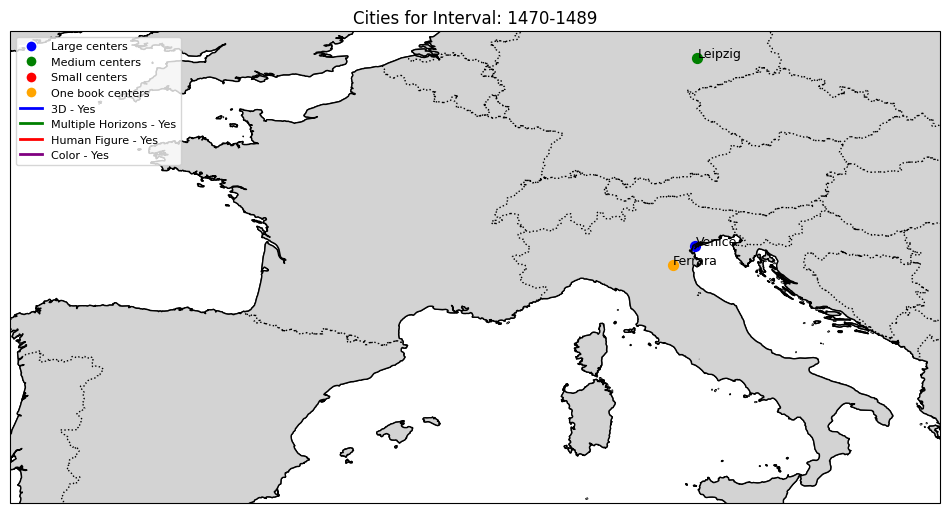

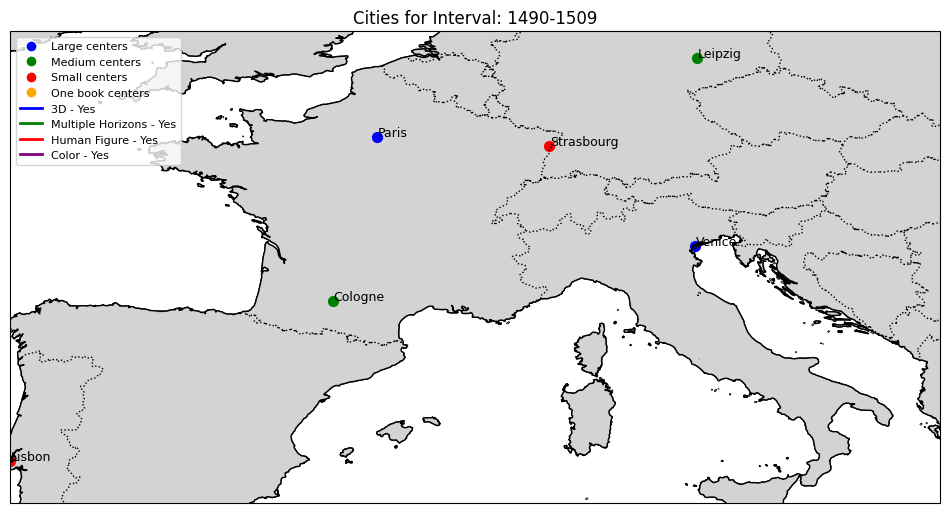

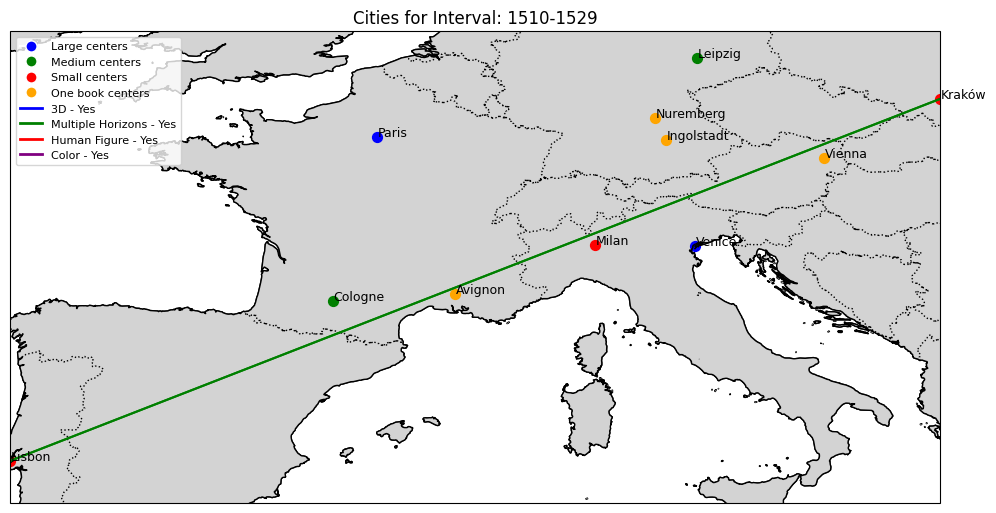

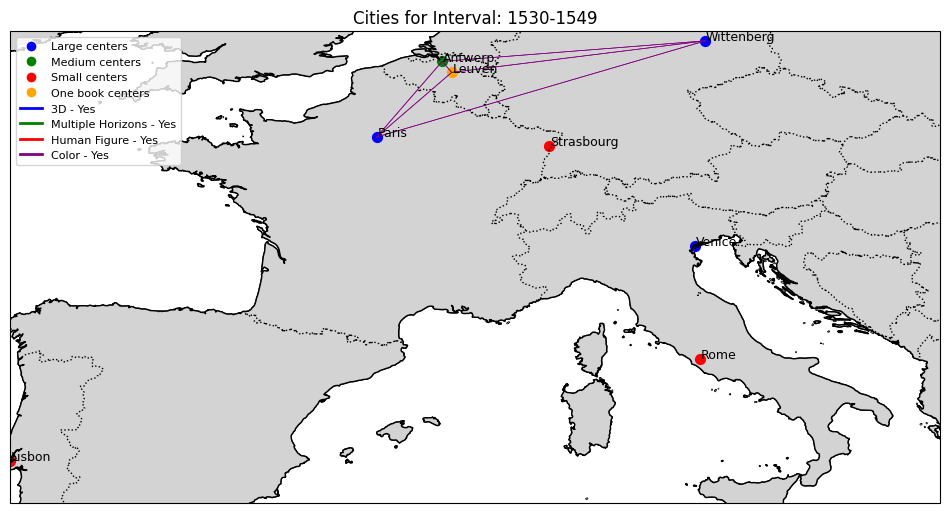

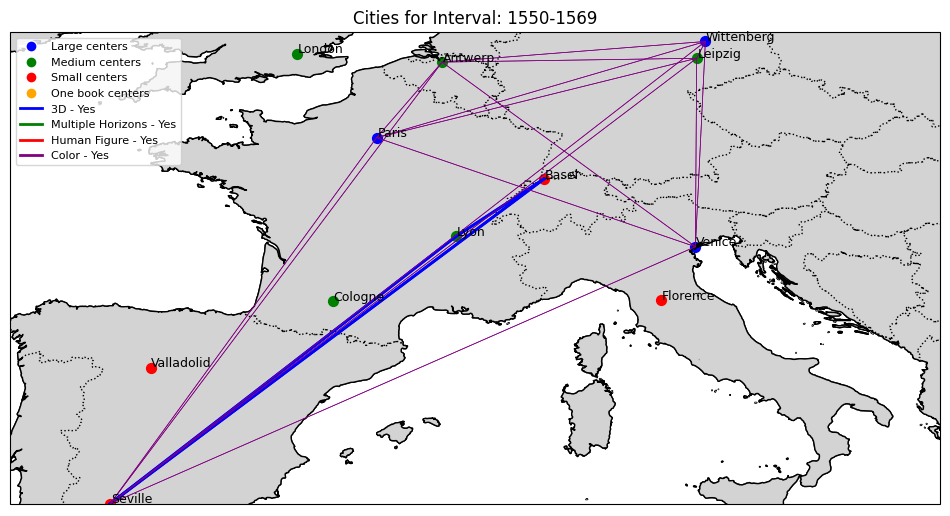

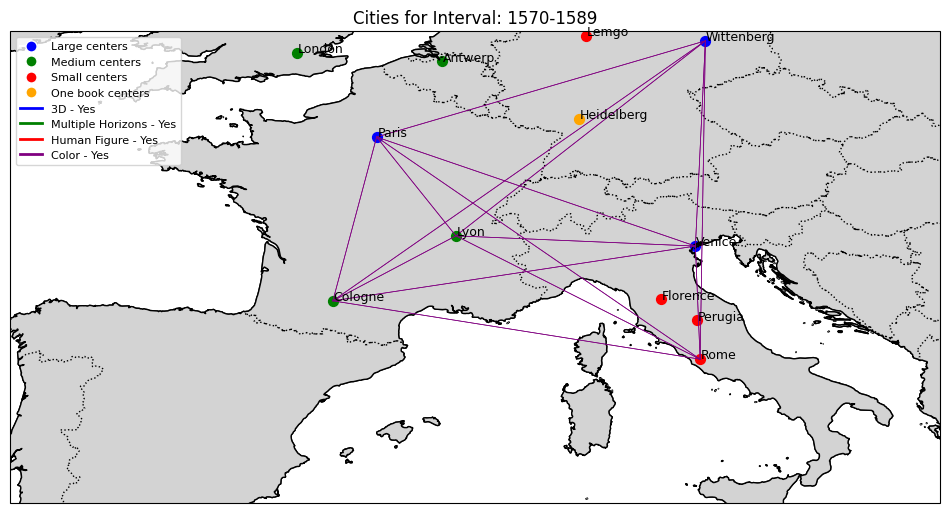

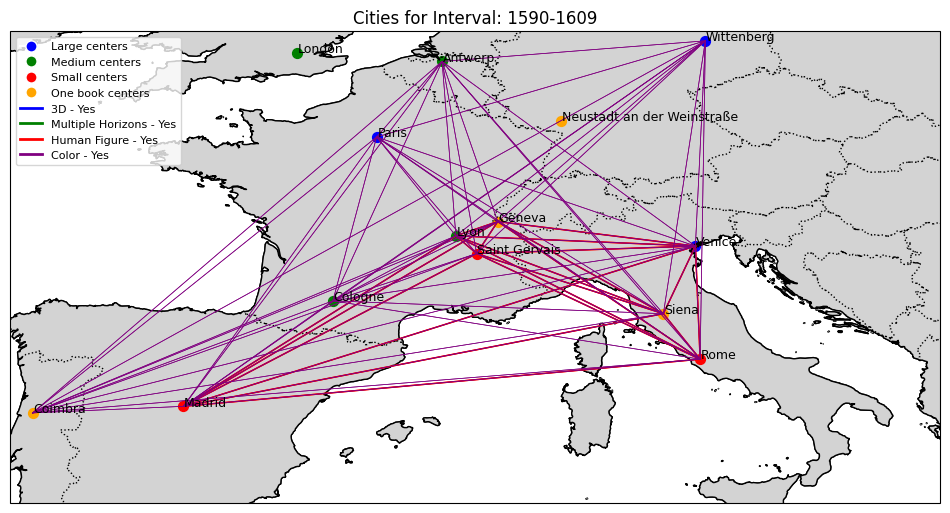

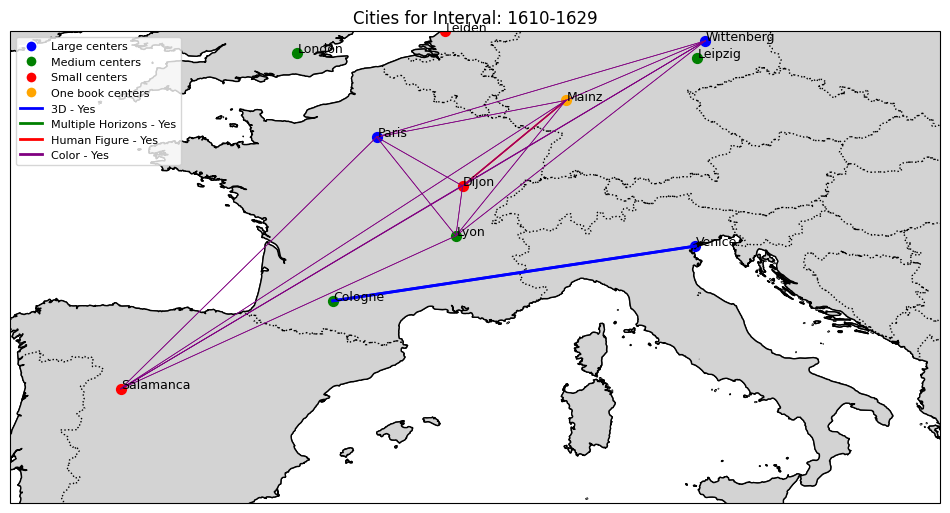

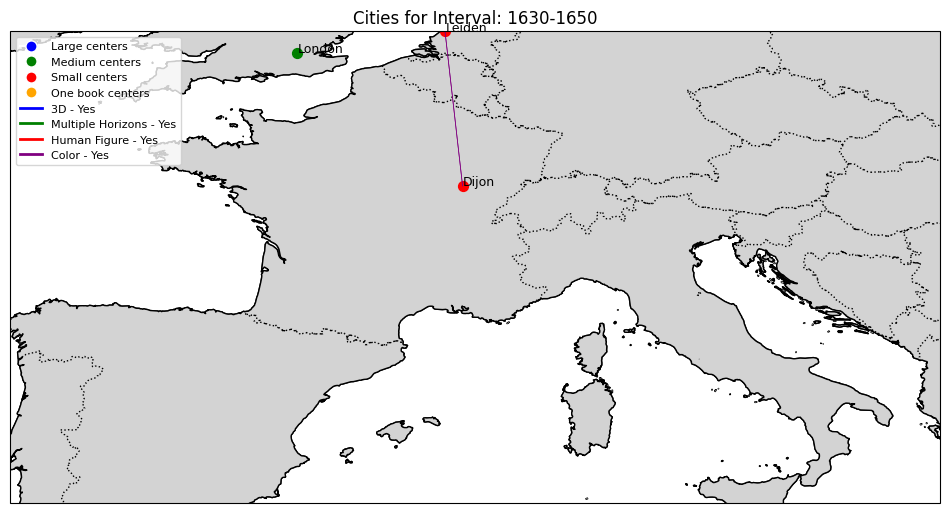

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Ensure the category_to_color dictionary matches the categories in your dataset
category_to_color = {
    'Large centers': 'blue',
    'Medium centers': 'green',
    'Small centers': 'red',
    'One book centers': 'orange'
}

# Function to plot the map for each interval in the right_oblique_visual DataFrame
def plot_static_map_for_interval_right_oblique_visual(interval):
    # Calculate the bounds for the map dynamically based on the data
    min_lon = right_oblique_visual['longitude'].min()
    max_lon = right_oblique_visual['longitude'].max()
    min_lat = right_oblique_visual['latitude'].min()
    max_lat = right_oblique_visual['latitude'].max()

    # Create a new figure for each interval
    fig, ax = plt.subplots(figsize=(12, 8), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Add base map features
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')

    # Set map bounds (adjust these values as per your data's extent)
    ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

    # Filter data for the current interval
    df_interval = right_oblique_visual[right_oblique_visual['interval'] == interval]

    # Create a GeoDataFrame
    gdf = gpd.GeoDataFrame(df_interval, 
                           geometry=gpd.GeoSeries.from_xy(df_interval['longitude'], df_interval['latitude']),
                           crs="EPSG:4326")

    # Drop duplicate cities based on 'place' column
    gdf_unique_cities = gdf.drop_duplicates(subset=["place"])

    # Lists for storing cities based on conditions
    cities_with_3D = []  # '3D' column is 'yes'
    cities_with_multiple_horizons = []  # 'Multiple horizons' column is 'yes'
    cities_with_human_figure = []  # 'human figure' column is 'yes'
    cities_with_color = []  # 'color' column is 'yes'

    # Plot all cities on the map
    for _, row in gdf_unique_cities.iterrows():
        category = row['place_category']
        
        # Ensure that category is valid, otherwise skip
        if category not in category_to_color:
            continue  # Skip invalid categories
        
        color = category_to_color[category]  # Get color for place category

        # Plot the city circle with the assigned color
        ax.scatter(row['longitude'], row['latitude'], color=color, s=50, transform=ccrs.PlateCarree())

        # Add the city name close to the point
        ax.text(row['longitude'] + 0.02, row['latitude'] + 0.02, row['place'], 
                color='black', fontsize=9, ha='left', transform=ccrs.PlateCarree())

        # Check if this city meets the condition for '3D'
        if row['3D'] == 'yes':
            cities_with_3D.append((row['place'], row['longitude'], row['latitude'], color))

        # Check if this city meets the condition for 'Multiple horizons'
        if row['Multiple horizons'] == 'yes':
            cities_with_multiple_horizons.append((row['place'], row['longitude'], row['latitude'], color))

        # Check if this city meets the condition for 'human figure'
        if row['human figure'] == 'yes':
            cities_with_human_figure.append((row['place'], row['longitude'], row['latitude'], color))

        # Check if this city meets the condition for 'color'
        if row['color'] == 'yes':
            cities_with_color.append((row['place'], row['longitude'], row['latitude'], color))

    # Draw lines between cities with 'yes' in the '3D' column (Blue lines)
    for i, (_, lon1, lat1, _) in enumerate(cities_with_3D):
        for j, (_, lon2, lat2, _) in enumerate(cities_with_3D):
            if i != j:  # Avoid lines to the same city
                ax.plot([lon1, lon2], [lat1, lat2], color='blue', linewidth=2, transform=ccrs.PlateCarree())

    # Draw lines between cities with 'yes' in the 'Multiple horizons' column (Green lines)
    for i, (_, lon1, lat1, _) in enumerate(cities_with_multiple_horizons):
        for j, (_, lon2, lat2, _) in enumerate(cities_with_multiple_horizons):
            if i != j:  # Avoid lines to the same city
                ax.plot([lon1, lon2], [lat1, lat2], color='green', linewidth=1.5, transform=ccrs.PlateCarree())

    # Draw lines between cities with 'yes' in the 'human figure' column (Red lines)
    for i, (_, lon1, lat1, _) in enumerate(cities_with_human_figure):
        for j, (_, lon2, lat2, _) in enumerate(cities_with_human_figure):
            if i != j:  # Avoid lines to the same city
                ax.plot([lon1, lon2], [lat1, lat2], color='red', linewidth=1, transform=ccrs.PlateCarree())

    # Draw lines between cities with 'yes' in the 'color' column (Purple lines)
    for i, (_, lon1, lat1, _) in enumerate(cities_with_color):
        for j, (_, lon2, lat2, _) in enumerate(cities_with_color):
            if i != j:  # Avoid lines to the same city
                ax.plot([lon1, lon2], [lat1, lat2], color='purple', linewidth=0.5, transform=ccrs.PlateCarree())

    # Set title for the current interval
    ax.set_title(f"Cities for Interval: {interval}")

    # Create the legend for place categories (circle colors)
    legend_labels = list(category_to_color.keys())  # Get the place category labels
    legend_colors = list(category_to_color.values())  # Get the corresponding colors for the place categories
    
    # Create handles for the circles (place categories)
    place_category_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) for color in legend_colors]
    
    # Create line color handles (for the conditions)
    line_handles = [
        plt.Line2D([0], [0], color='blue', lw=2, label="3D - Yes"),
        plt.Line2D([0], [0], color='green', lw=2, label="Multiple Horizons - Yes"),
        plt.Line2D([0], [0], color='red', lw=2, label="Human Figure - Yes"),
        plt.Line2D([0], [0], color='purple', lw=2, label="Color - Yes")
    ]
    
    # Combine both the circle handles and line handles into one list
    combined_handles = place_category_handles + line_handles
    combined_labels = legend_labels + ["3D - Yes", "Multiple Horizons - Yes", "Human Figure - Yes", "Color - Yes"]
    
    # Add the combined legend to the plot
    ax.legend(handles=combined_handles, labels=combined_labels, loc="upper left", fontsize=8)

    #  # Save the plot as a file (change the path as needed)
    # output_filename = f"map_for_interval_{interval}.png"
    # plt.savefig(output_filename, bbox_inches='tight')  # Save the figure to a file
    
    # Show the plot
    plt.show()

# Sort the intervals in chronological order
sorted_intervals = sorted(right_oblique_visual['interval'].unique())

# Plot static maps for each time interval
for interval in sorted_intervals:
    plot_static_map_for_interval_right_oblique_visual(interval)
